<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Classification - Heart Disease</p>
<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:130%;text-align:left;border-radius:6px 6px;padding:15px">
In this kernel, we will deal with a dataset that contains various health metrics from patients heart, including age, blood pressure, heart rate and more. <br />
Our goal is to develop a predictive model capable of accurately identifying individuals with heart disease.
<br />
<br />
Author: Muhammad Shafa Praramadhana</p>





<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Import Library</p>

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

sns.set(rc={'axes.facecolor': '#f8f9fa'}, style='darkgrid')
palette = ["#835656", "#baa0a0", "#ffc7c8", "#a9a799", "#65634a", "#f77f00"]
warnings.filterwarnings('ignore')

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Import Dataset</p>

In [55]:
df = pd.read_csv('/kaggle/input/heartcsv/heart.csv')

In [56]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">About The Dataset</p>
<br />
    
|Variables|Explanation|
|-------|-------|
|age|The age of the patient in years|
|sex|Gender of the patient (0: female, 1: male)
|cp|Type of chest pain: <br />0: Typical angina <br />1: Atypical angina <br />2: Non-anginal pain<br /> 3: Asymptomatic|
|trestbps|Resting blood pressure in mm Hg|
|chol|Serum cholestrol in mg/dl|
|fbs|Fasting blood sugar > 120 mg/dl (1: True, 0: False)|
|restecg|Resting electrocardiographic results: <br />0: Normal <br />1: Having ST-T wave abnormality <br />2: Showing probable or definite left ventricular hypertrophy|
|thalach|Maximum heart rate achieved|
|exang|Exercise induced angina|
|oldpeak|ST depression induced by exercise relative to rest|
|slope|Slope of the peak exercise ST segment: <br />0: Upslopping <br />1: Flat <br />2: Downslopping|
|ca|Number of major vessels (0-4) colored by fluoroscopy|
|thal|Thalium stress test result: <br />0: Normal <br />1: Fixed defect <br />2: Reversible defect <br />3: Not describe|
|target|Heart disease status (0: no disease, 1: presence of disease)|


<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Exploratory Data Analysis</p>

In [57]:
df.shape

(303, 14)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


**Conclusions:**
* The dataset consist of 303 datapoints with 14 columns corresponding to various attributes of the patients and results of test
* Most of the columns are of the int64 data type
* Doesn't seem to have any missing values

**Note:** Based on the dataset explanation we had earlier, we can see that 9 columns (sex, cp, fbs, restecg, exang, slope, ca, thal and target) are indeed numerical in terms of data type, but categorical in terms of their semantics. So i will convert these feature to object for a much proper analysis

In [59]:
continuous_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

to_convert = [feature for feature in df.columns if feature not in continuous_features]

df[to_convert] = df[to_convert].astype('object')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    object 
 2   cp        303 non-null    object 
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    object 
 6   restecg   303 non-null    object 
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    object 
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    object 
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    object 
dtypes: float64(1), int64(4), object(9)
memory usage: 33.3+ KB


**Statistical summary for numerical variables**

In [61]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


**Conclusions:**

* age: The average age of the patiens is 54 years, with the youngest is 29 and the oldest is 77
* trestps: The average resting blood pressure is about 131.62 mm Hg, with the minimum is 94 mm Hg and the maximum is 200 mm Hg
* chol: The average serum cholestrol is 245.26 mg/dl, with a range from 126 mg/dl to 564 mg/dl
* thalach: The average maximum heart rate achieved is 129.64, with the minimum is 71 and the maximum is 202
* oldpeak: The average ST depression induced by exercise relative to rest is 1.039, ranging from 0 to 6.2

**Statistical summary for categorical variable**

In [62]:
df.describe(include = 'object')

,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,303,303,303,303,303,303,303,303,303
unique,2,4,2,3,2,3,5,4,2
top,1,0,0,1,0,2,0,2,1
freq,207,143,258,152,204,142,175,166,165


**Conclusions:**

* sex: Female are the most frequent category, occuring 207 out of 303 times
* cp: There are 4 unique types of chest pain, with the most common type is typical angina denoting with '0'
* fbs: There are 2 categories, with the most common type is '0', which indicating fasting blood sugar level categorized below 120 md/dl
* restecg: There are 3 unique results present. With the most common type is 1 appearing 152 out of 303 times
* exang: Most of the patient (204 out of 303) has an exercised-induced angina
* slope: Almost 50% of the patient has downslopping type of slope
* ca: The most occuring value is 0, which means most of the patient has 0 number of major vessels colored by fluoroscopy
* thal: The most common type of thalium stress test result is 2, indicating reversible defect
* target: more than 50% of the patient suffering from heart disease

**Univariate analysis**
<br />

We will focus on each feature to understand the distribution and the range.
<br />

For continuous variables, we employ histograms to gain insight into the distribution of each feature. For categorical variables, we will use barplot to visualize the frequency of each category.

**Numerical variable univariate analysis**

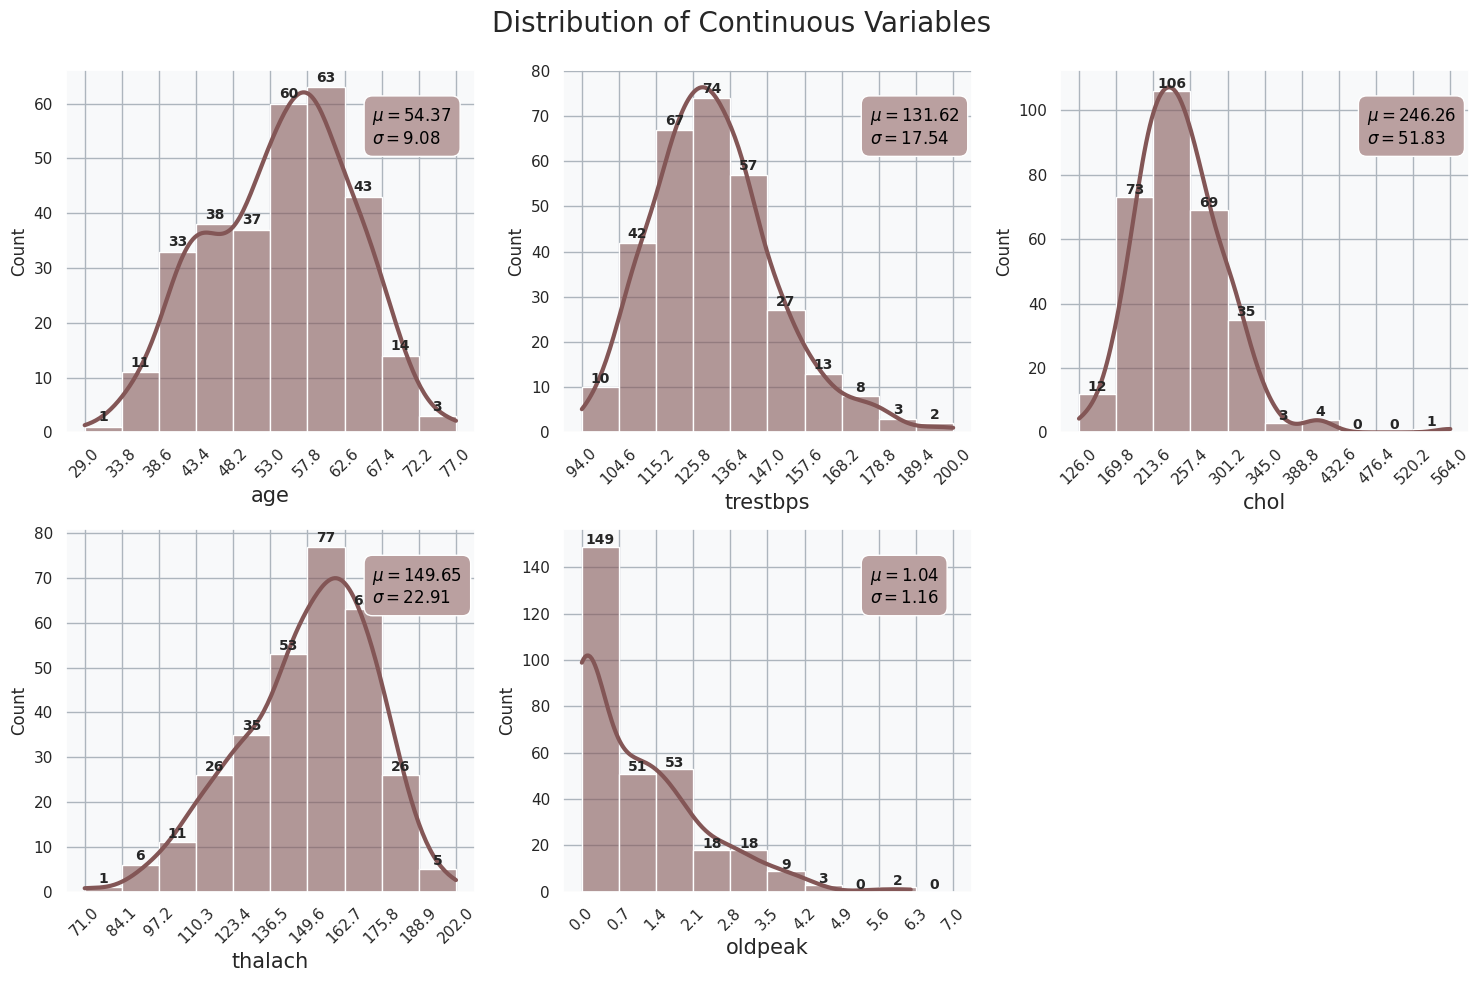

In [63]:
df_continuous = df[continuous_features]

fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (15, 10))

for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    
    values, bin_edges = np.histogram(df_continuous[col], range = (np.floor(df_continuous[col].min()),
                                                                  np.ceil(df_continuous[col].max())))
    
    graph = sns.histplot(data = df_continuous, x = col, bins = bin_edges, color = palette[0], kde = True,
                        alpha = 0.6, line_kws = {'lw': 3}, ax = ax[x, y])
    
    ax[x, y].set_xlabel(col, fontsize = 15)
    ax[x, y].set_ylabel('Count', fontsize = 12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation = 45)
    ax[x, y].grid(color = '#adb5bd')
    
    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                         ha = 'center', fontsize = 10, fontweight = 'bold')
    
    text = '\n'.join((r'$\mu=%.2f$' % df_continuous[col].mean(),
                     r'$\sigma=%.2f$' % df_continuous[col].std()))
    
    ax[x, y].text(0.75, 0.9, text, transform = ax[x, y].transAxes, fontsize = 12, verticalalignment = 'top',
                 color = 'black', bbox = dict(boxstyle = 'round', facecolor = palette[1], edgecolor = 'white',
                                             pad = 0.5))

ax[1, 2].axis('off')
plt.suptitle('Distribution of Continuous Variables', fontsize = 20)
plt.tight_layout()
plt.subplots_adjust(top = 0.92)
plt.show()

**Conclusions:**

* age: The age variable have a normal distribution, with the average age is 54 years and the standard deviation is 9.08 years 
* trestbps: Most individuals have resting blood pressure between 115 to 140 mm Hg
* chol: The serum cholestrol for most patient is concentrate around 170 to 257 mg/dl
* thalach: Maximum heart rate achieved during a stress test is around 136 to 175 for most patients. With the mean is 149.65 and the standard deviation is 22.91
* oldpeak: This histogram is right skewed. Most of the values of ST depression induced by exercise is concentrated around 0.0 to 0.7, indicating that most of the patients did not experiencing ST depression during exercise. The mean is 1.04, with a standard deviation of 1.16

**Categorical variable univariate analysis**

In [64]:
categorical_features = [var for var in df.columns if (var not in continuous_features)]
df_categorical = df[categorical_features]

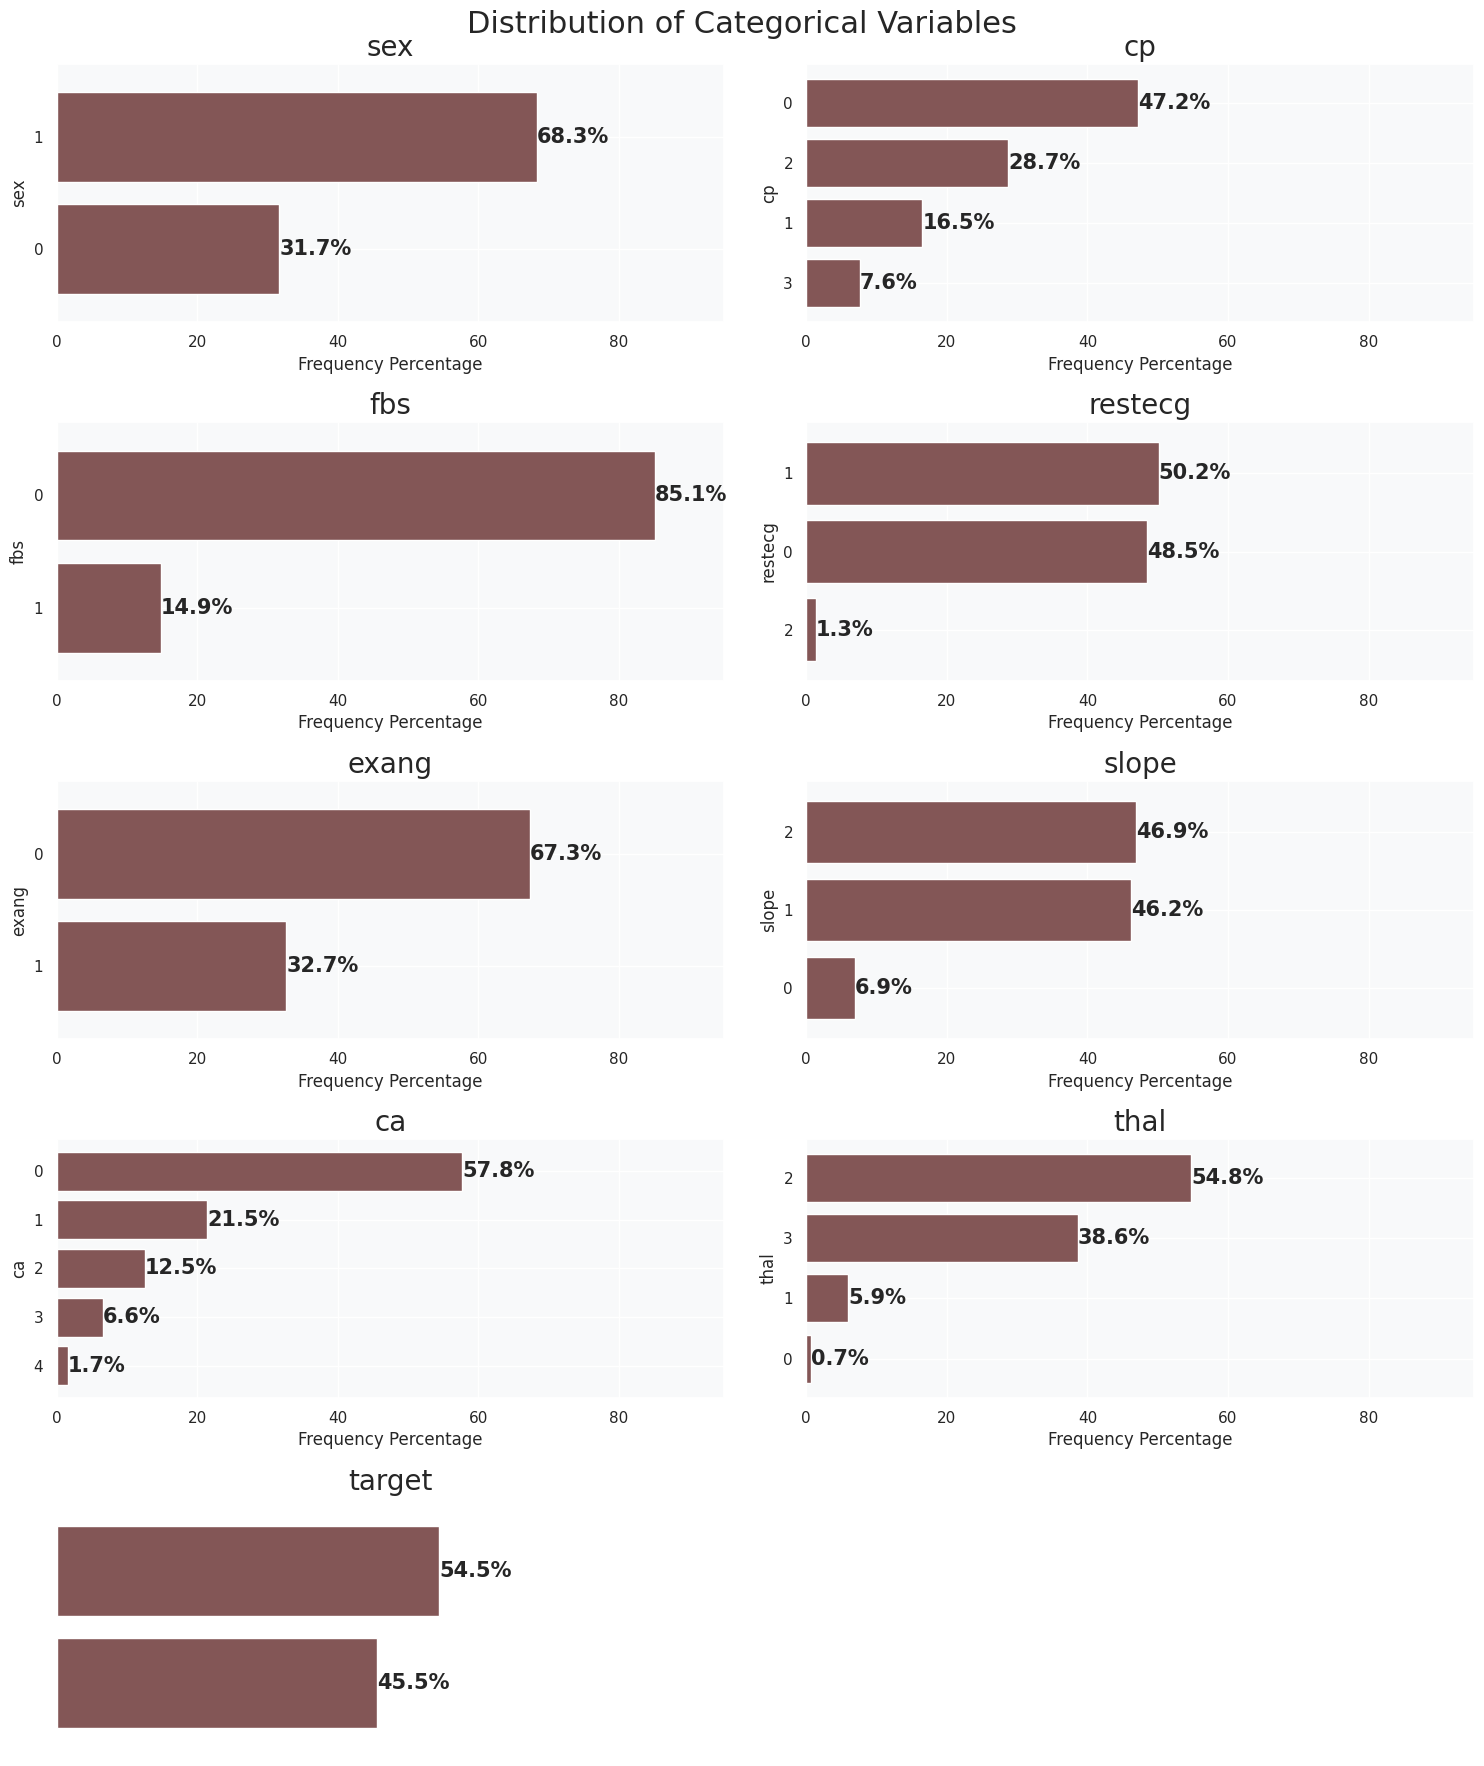

In [65]:
fig, ax = plt.subplots(5, 2, figsize = (15, 18))

for i, col in enumerate(categorical_features):
    x = i // 2
    y = i % 2
    
    value_counts = df[col].value_counts(normalize = True).mul(100).sort_values()
    
    value_counts.plot(kind = 'barh', ax = ax[x, y], width = 0.8, color = palette[0])
    
    for j, val in enumerate(value_counts):
        ax[x, y].text(val, j, str(round(val, 1)) + '%', fontsize = 15,
                     weight = 'bold', va = 'center')
    
    ax[x, y].set_xlim([0, 95])
    ax[x, y].set_xlabel('Frequency Percentage', fontsize = 12)
    ax[x, y].set_title(f'{col}', fontsize = 20)

ax[4, 0].axis('off')
ax[4, 1].axis('off')
plt.suptitle('Distribution of Categorical Variables', fontsize = 22)
plt.tight_layout()
plt.subplots_adjust(top = 0.95)
plt.show()

**Conclusions:**

* Age: The number of female patient is a lot higher than the number of male patient, showing significant majority
* cp: 47.2 of the patient experiencing chest pain type 0, which is typical angina
* fbs: It is interesting how a significant majority of patient have a fasting blood sugar level above 120 mg/dl which is considered to be normal, showing that blood sugar level is not a common symptom for among the patient
* restecg: The number of patient with normal resting electrocardiographic result and patient having ST-T wave abnormality is slightly balance, the distance only 1.7%, and the rest is patients that showing probable or definite left ventricular hypertrophy
* exang: The majority of the patient does not suffer by angina while exercising, indicating that exercise-induced angina is not a common symptom
* slope: The dataset shows different slopes of the peak exercise ST segment. A specific type might be more common, and its distribution can be inferred from the bar plots
* ca: A significant majority of the patient having 0 number of major vessel colored by fluoroscopy
* thal: The thalium stress test result for most of the patient is normal

**Bivariate analysis**
<br />
We are going to gain a deeper understanding of the relationship between individual features and target, revealing potential predictors for heart diseases

**Numerical features vs target**

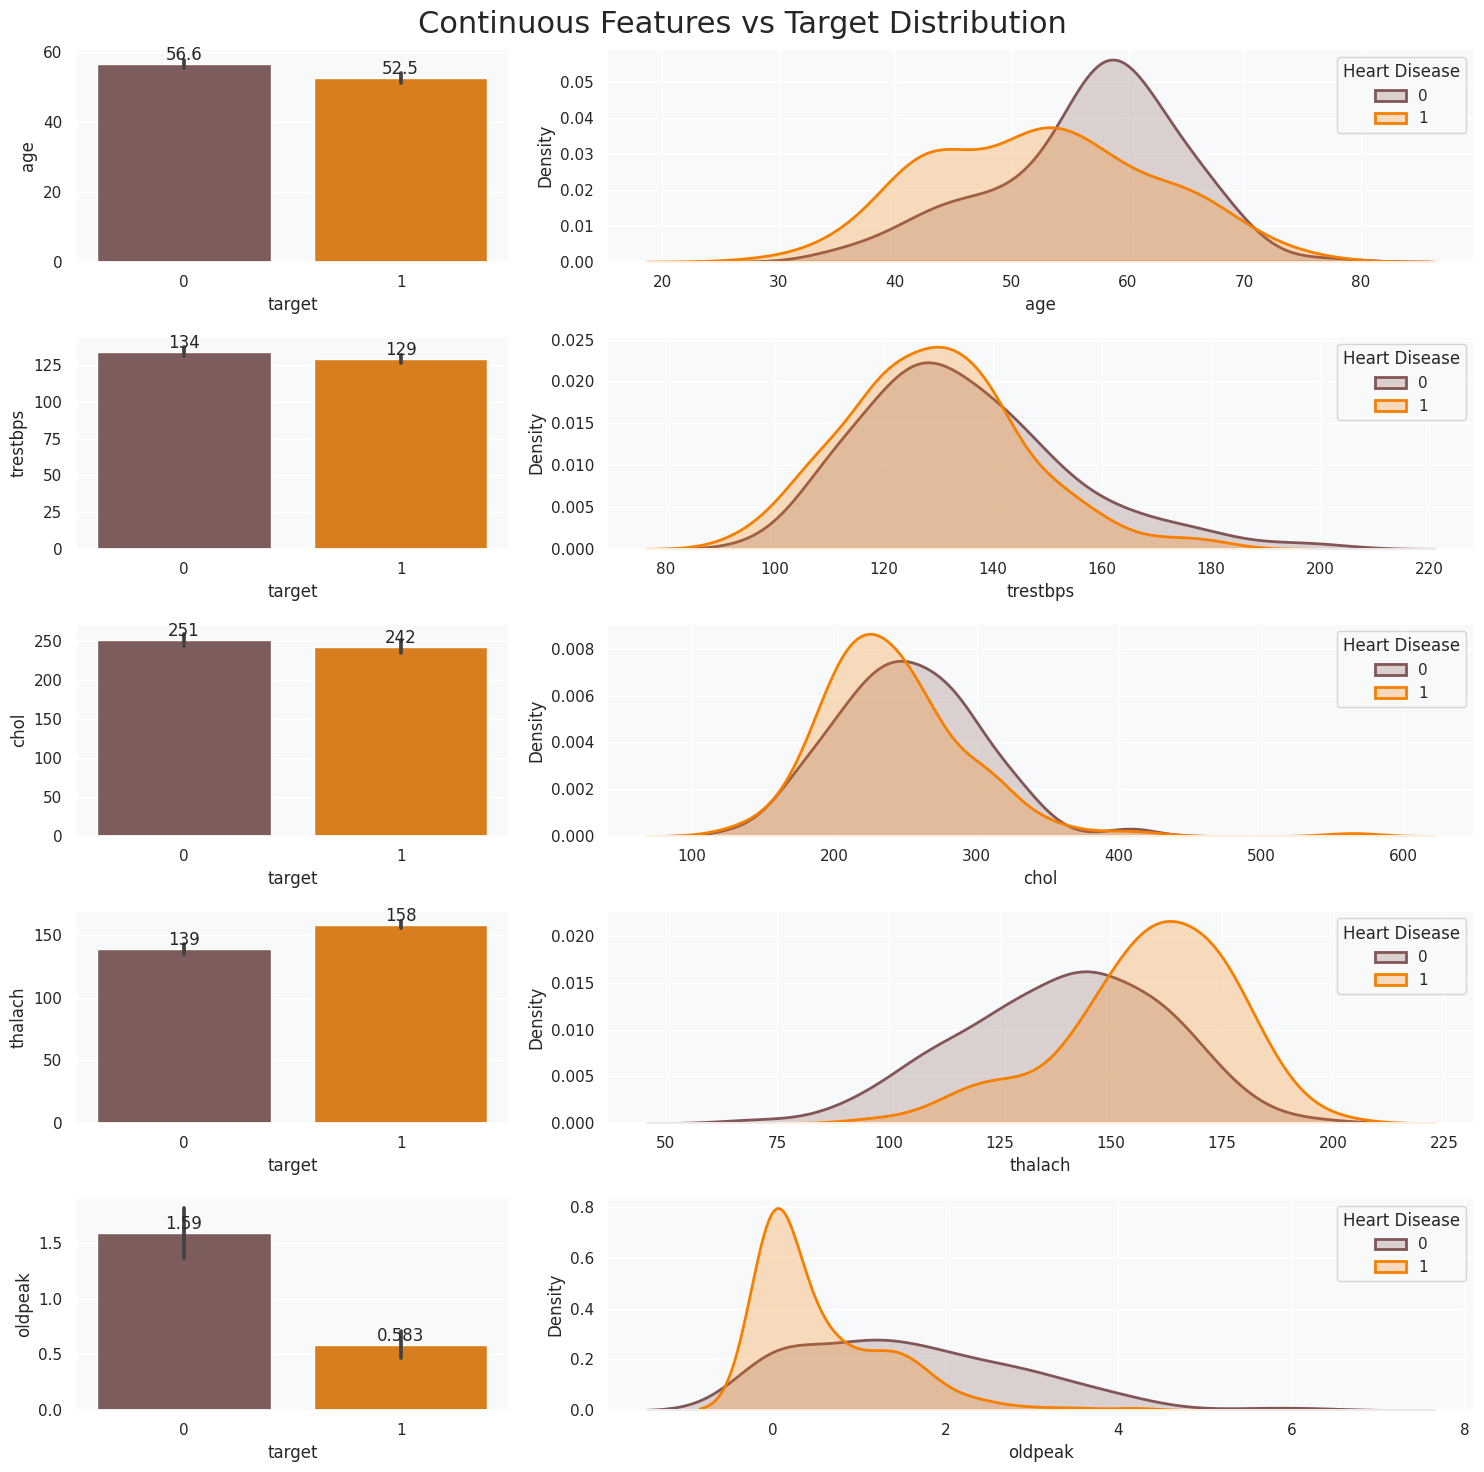

In [66]:
sns.set_palette([palette[0], palette[len(palette) - 1]])

fig, ax = plt.subplots(len(continuous_features), 2, figsize = (15, 15), 
                       gridspec_kw = {'width_ratios': [1, 2]})

for i, col in enumerate(continuous_features):
    sns.barplot(x = df['target'], y = df[col], ax = ax[i, 0], palette = [palette[0], palette[len(palette) - 1]])
    
    ax[i, 0].set_xlabel('target')
    ax[i, 0].set_ylabel(col)
    ax[i, 0].bar_label(ax[i,0].containers[0], fmt = '%.3g')
    
    sns.kdeplot(data = df[df['target'] == 0], x = col, fill = True, palette = palette, linewidth = 2, ax = ax[i, 1], label = '0')
    sns.kdeplot(data = df[df['target'] == 1], x = col, fill = True, palette = palette, linewidth = 2, ax = ax[i, 1], label = '1')    
    
#     ax[i, 1].set_yticks([])
    ax[i, 1].legend(title = 'Heart Disease', loc = 'upper right')
    
plt.suptitle('Continuous Features vs Target Distribution', fontsize = 22)
plt.tight_layout()
plt.show()

**Conclusions:**

* age: The distribution shows a slight different, with patients having heart diseases being a bit younger on average than patients without heart disease.
* trestbps: Both categories display overlapping distribution in the KDE plot, with nearly identical mean values. Showing that this feature doesnt have much influential
* chol: The distribution of cholestrol level on both categories are quite close. The KDE plot shows the patiens with heart disease showing a slightly lower cholestrol level
* thalach: There's noticeable difference in distributions. The patients with heart disease tend to achieve a higher maximum heart rate during stress test
* oldpeak: The ST depression induced by exercise relative to test mean is much lower for patients with heart disease, where the patients without heart disease has a wider spread

<br />

Based on the visual difference in distributions and mean values. Maximum heart rate (thalach) seems to have significant impact on the heart disease status, followed by ST depression (oldpeak) and Age (age)

**Categorical features vs target**

In [67]:
categorical_features = [var for var in df.columns if (var not in continuous_features)]
df_categorical = df[categorical_features]

IndexError: index 2 is out of bounds for axis 0 with size 2

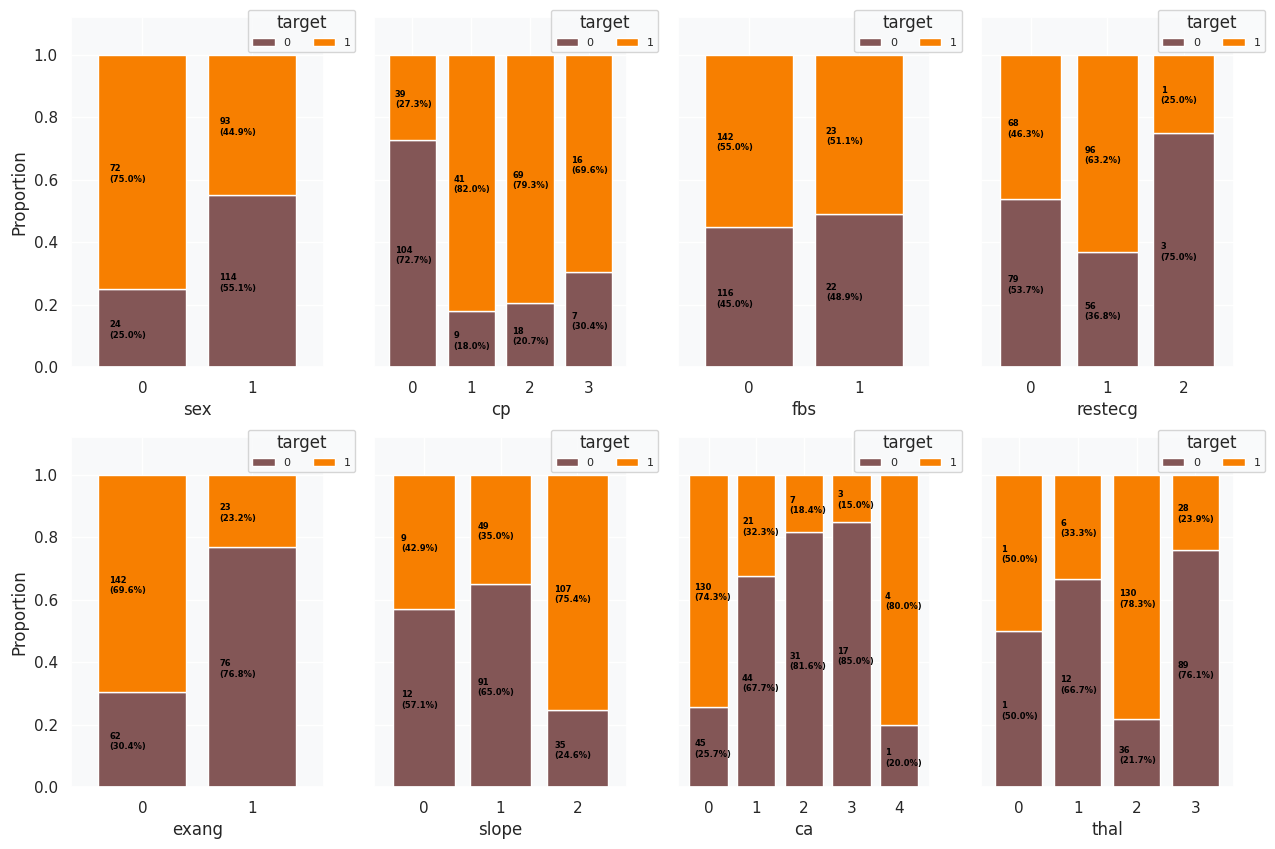

In [68]:
from matplotlib.colors import ListedColormap

fig, ax = plt.subplots(2, 4, figsize = (15, 10))

for i, col in enumerate(categorical_features):
    cross_tab = pd.crosstab(index = df[col], columns = df['target'])
    cross_tab_prop = pd.crosstab(index = df[col], columns = df['target'], normalize = 'index')
    
    x, y = i // 4, i % 4
    
    cmap = ListedColormap([palette[0], palette[len(palette) - 1]])
    
    cross_tab_prop.plot(kind = 'bar', ax = ax[x, y], stacked = True, width = 0.8, colormap = cmap,
                       legend = False, ylabel = 'Proportion', sharey = True)
    
    for j, val in enumerate([*cross_tab.index.values]):
        for (proportion, count, y_location) in zip(cross_tab_prop.loc[val], cross_tab.loc[val],
                                                  cross_tab_prop.loc[val].cumsum()):
            ax[x, y].text(x = j - 0.3, y = (y_location - proportion) + (proportion / 2) - 0.03,
                         s = f'{count}\n({np.round(proportion * 100, 1)}%)', color = 'black',
                         fontsize = 6, fontweight = 'bold')
    
    ax[x, y].legend(title = 'target', loc = (0.7, 0.9), fontsize = 8, ncol = 2)
    ax[x, y].set_ylim([0, 1.12])
    ax[x, y].set_xticklabels(ax[x, y].get_xticklabels(), rotation = 0)

plt.suptitle('Categorical Features vs Target Stacked Barplots', fontsize = 22)
plt.tight_layout()
plt.show()


**Conclusions:**

* sex: The plot shows us that gender is an influential factor in predicting heart disease, we can see that female (1) has a lower proportion of heart disease comparing to male (0)
* cp: Different type of chest pains have a various proportion of heart disease. Type 1, 2 and 3 have a higher proportion of heart disease compared to type 0. This shows us that type of chest pain can be influential in predicting heart disease
* fbs: The proportion of patients with fasting blood sugar > 120 mg/dl and patients with fasting blood sugar < 120 mg/dl is pretty much similiar. From this we can know that fasting blood sugar (fbs) does not influential (has limited impact) on predicting heart disease
* restecg: Patients that having ST-T wave abnormality (1) showing higher proportion of heart disease comparing to type 0 and 3
* exang: We can be sure that this feature have a significant impact on the target, knowing that patients who did not experiencing exercise-induced angina (0) show a significantly higher proportion of heart disease
* slope: The slope type 2 has much higher proportion of heart disease compared to the other type, indicating its potential predictor
* ca: The majority patients with heart disease have fewer major vessels colored by fluoroscopy. And as the number of colored vessels increased, the proportion of patients with heart disease tends to dicrease, especially patients with 4 major vessels colored by fluoroscopy
* thal: The reversible defect category (2) has a higher proportion of hear disease compared to the other type, emphasizing its importance in prediction

<br />

1. Higher impact on target: sex, cp, exang, slope, ca, thal
2. Moderate impact on target: fbs
3. Lower impact on target: fbs

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Data Preprocessing</p>

**Checking for null values**

In [69]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

It is obvious that there are no missing values in our dataset

In [70]:
continuous_features

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

**Checking outliers using the IQR method for continuous features**

In [71]:
Q1 = df[continuous_features].quantile(0.25)
Q3 = df[continuous_features].quantile(0.75)

IQR = Q3 - Q1
upper_limit = Q3 + 1.5 * IQR
lower_limit = Q1 - 1.5 * IQR

outliers = ((df[continuous_features] < lower_limit) |( df[continuous_features] > upper_limit)).sum()
outliers

age         0
trestbps    9
chol        5
thalach     1
oldpeak     5
dtype: int64

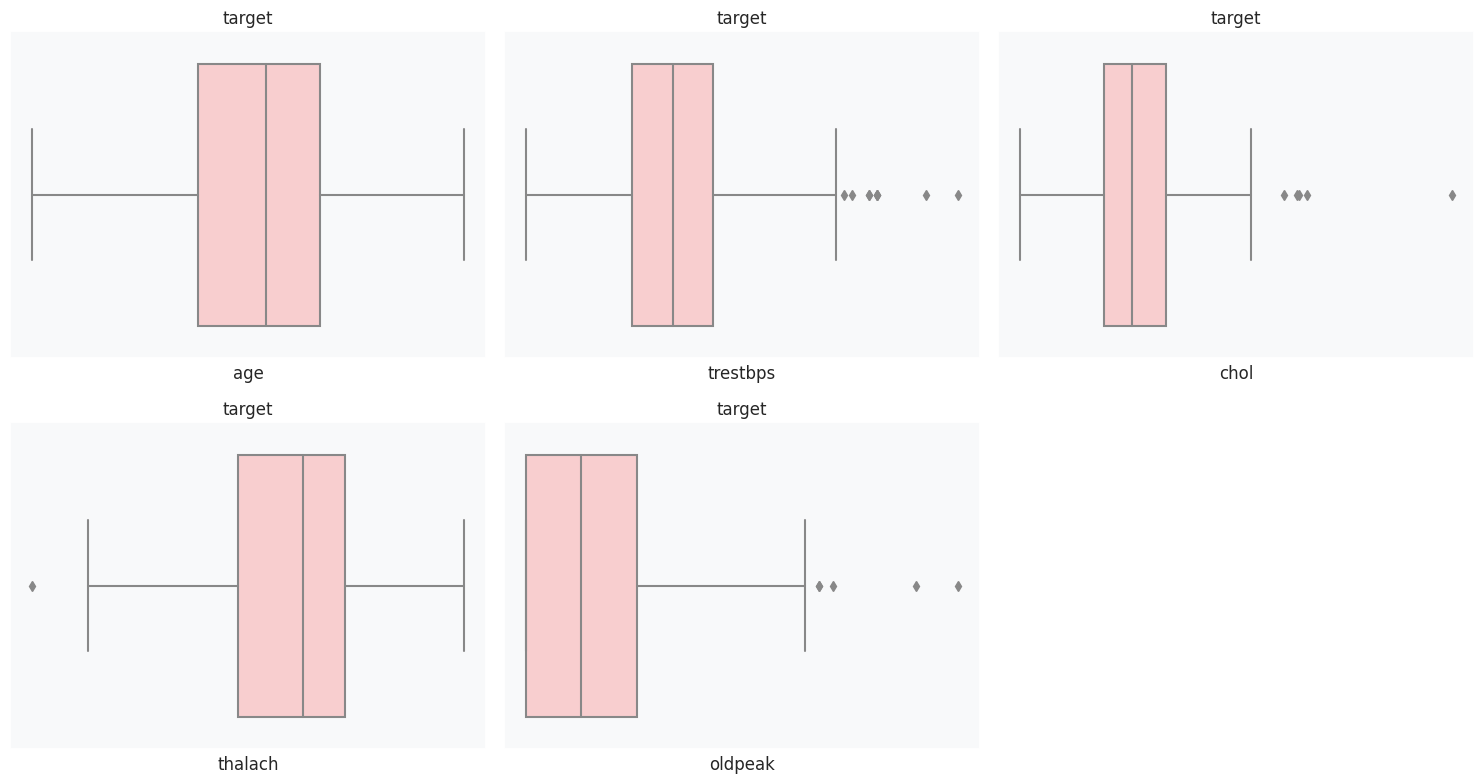

In [86]:
num_cols = len(continuous_features)
num_rows = (num_cols + 2) // 3
num_cols_per_subplot = min(num_cols, 3)

fig, axes = plt.subplots(num_rows, num_cols_per_subplot, figsize = (15, 4 * num_rows))

axes = axes.flatten()

for i, var in enumerate(continuous_features):
    
    sns.boxplot(data = df, x = var, color = palette[2], ax = axes[i])
    
    axes[i].set_title(col)
    axes[i].set_xticks([])

for i in range(num_cols, num_rows * num_cols_per_subplot):
    fig.delaxes(axes[i])
    
plt.tight_layout()
plt.show()    

**Conclusions:**
<br />
We can notice that theres some outliers in the continuous features, direct removal of outliers might not be the best approach for the small size of our dataset. Instead we will focus on applying transformation like Box-Cox to reduce the impact of outliers and make the data more suitable for modelling.

**Categorical feature encoding**

In [74]:
from sklearn.preprocessing import OneHotEncoder

to_encode = ['cp', 'restecg', 'thal']

df_encoded = pd.get_dummies(df, columns = to_encode, drop_first = True, dtype = int)

In [75]:
to_convert = ['sex', 'fbs', 'exang', 'slope', 'ca', 'target']

df_encoded[to_convert] = df_encoded[to_convert].astype(int)

In [76]:
df_encoded.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,target,cp_1,cp_2,cp_3,restecg_1,restecg_2,thal_1,thal_2,thal_3
0,63,1,145,233,1,150,0,2.3,0,0,1,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.5,0,0,1,0,1,0,1,0,0,1,0
2,41,0,130,204,0,172,0,1.4,2,0,1,1,0,0,0,0,0,1,0
3,56,1,120,236,0,178,0,0.8,2,0,1,1,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.6,2,0,1,0,0,0,1,0,0,1,0


In [77]:
df_encoded.dtypes

age            int64
sex            int64
trestbps       int64
chol           int64
fbs            int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
target         int64
cp_1           int64
cp_2           int64
cp_3           int64
restecg_1      int64
restecg_2      int64
thal_1         int64
thal_2         int64
thal_3         int64
dtype: object

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Data Preprocessing</p>


**Define features and target**

In [78]:
X = df_encoded.drop(columns = ['target'], axis = 1)
y = df_encoded['target']

**Splitting data into train and test set**

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

The box-cox transformation requires all data to be positive. We will add small constant to oldpeak variable to make sure all the values are positive.

In [91]:
X_train['oldpeak'] = X_train['oldpeak'] + 0.001
X_test['oldpeak'] = X_test['oldpeak'] + 0.001

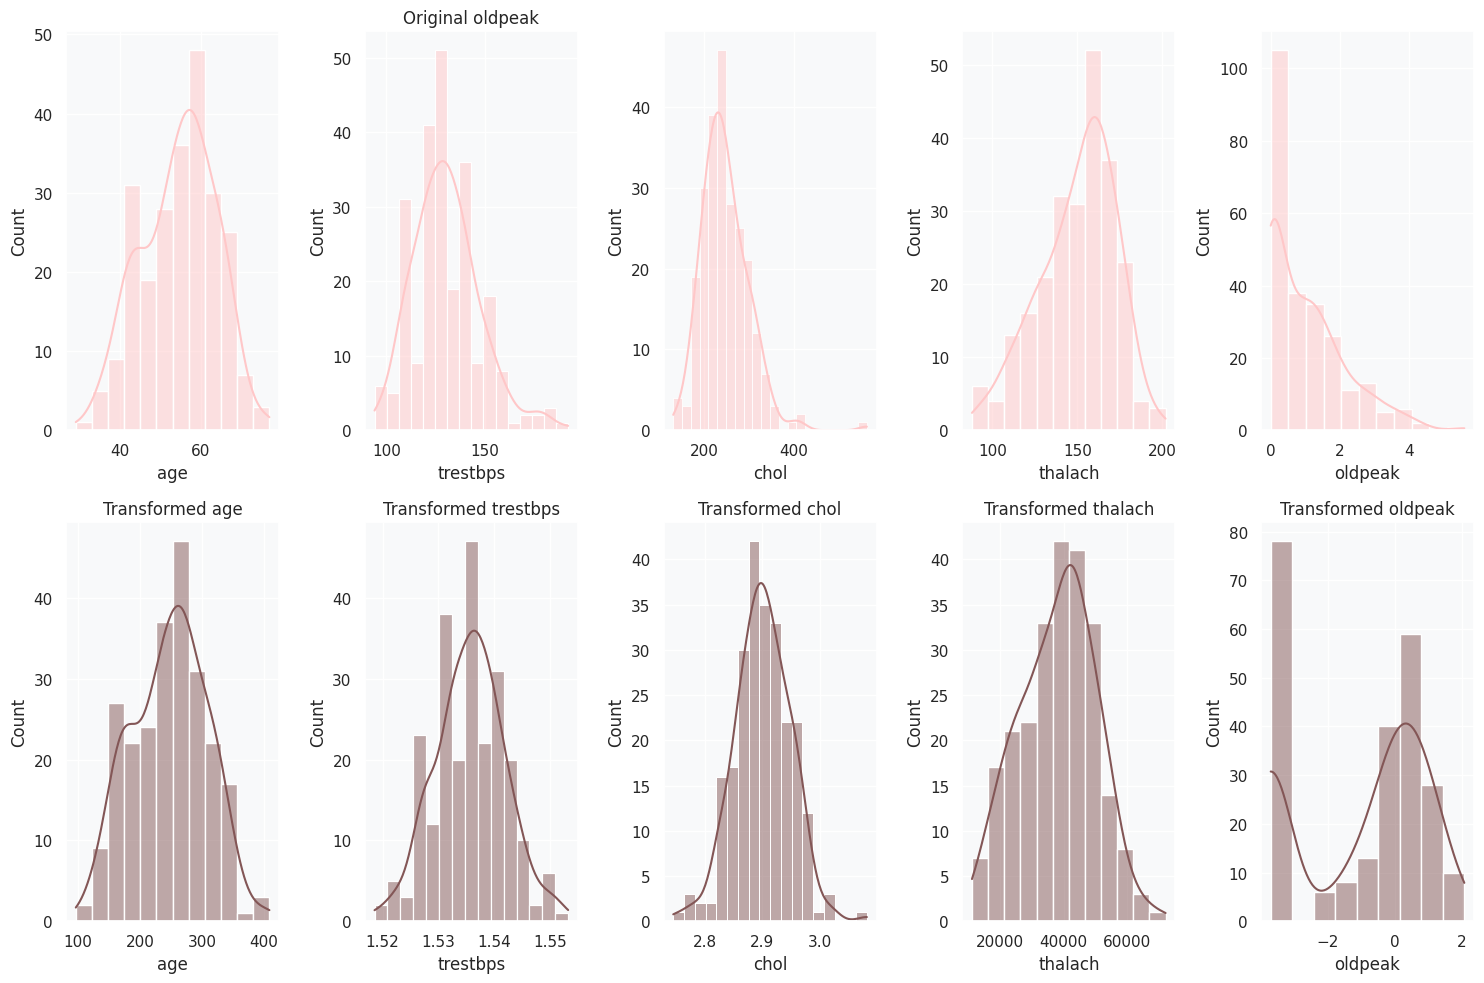

In [94]:
from scipy.stats import boxcox

fig, ax = plt.subplots(2, 5, figsize = (15, 10))

for i, col in enumerate(continuous_features):
    sns.histplot(X_train[col], kde = True, ax = ax[0, i], color = palette[2])
    ax[0, 1].set_title(f'Original {col}')

lambdas = {}

for i, col in enumerate(continuous_features):
    if X_train[col].min() > 0:
        X_train[col], lambdas[col] = boxcox(X_train[col])
        X_test[col] = boxcox(X_test[col], lmbda = lambdas[col])
        
        sns.histplot(X_train[col], kde = True, ax = ax[1, i], color = palette[0])
        ax[1, i].set_title(f'Transformed {col}')

fig.tight_layout()
fig.show()

**Conclusions:**

* age: After transformation, the distribution on age variable is closer to a normal distribution
* trestbps: Post-transformation distribution appears to be normal-like, with reduced skewness
* chol: After applying transformation, chol exhibits a shape that's more aligned with a normal distribution
* thalach: Thalach shows a distribution that close to normal after transformation
* oldpeak: We can see that the transfomation improve the distribution, but it still doesnt perfectly resemble a normal distribution

**Feature scaling**

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

<p style="background-color:#f0efeb;font-family:robotto;color:#682F2F;font-size:150%;text-align:center;border-radius:6px 6px;">Modeling</p>

**Define the hyperparameters tunners function**

In [98]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

def tune_hyperparameters(model, param_grid, X_train, y_train, scoring = 'recall', n_splits = 5):
    cv = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = 42)
    
    model_grid = GridSearchCV(model, param_grid, cv = cv, scoring = scoring, n_jobs = -1)
    model_grid.fit(X_train, y_train)
    
    return model_grid.best_estimator_, model_grid.best_params_

**Define the evaluation function**

In [99]:
from sklearn.metrics import accuracy_score

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict = True)
    
    metrics = {
        'precision_0': report['0']['precision'],
        'precision_1': report['1']['precision'],
        'recall_0': report['0']['recall'],
        'recall_1': report['1']['recall'],
        'f1_0': report['0']['f1-score'],
        'f1_1': report['1']['f1-score'],
        'macro_avg_precision': report['macro avg']['f1-score'],
        'accuracy': accuracy_score(y_test, y_pred)
    }
    
    df = pd.DataFrame(metrics, index = [model_name]).round(2)
    
    return df

**Decision tree hyperparameter tunning**

In [100]:
from sklearn.tree import DecisionTreeClassifier

dt_base = DecisionTreeClassifier()

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2]
}

best_dt, best_dt_hyperparameters = tune_hyperparameters(dt_base, param_grid_dt, X_train, y_train)

print('Decision Tree Best Hyperparameters: ', best_dt_hyperparameters)

Decision Tree Best Hyperparameters:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


**Decision tree model evaluation**

In [101]:
from sklearn.metrics import classification_report

print(classification_report(y_train, best_dt.predict(X_train)))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       109
           1       0.86      0.84      0.85       133

    accuracy                           0.84       242
   macro avg       0.84      0.84      0.84       242
weighted avg       0.84      0.84      0.84       242



In [102]:
print(classification_report(y_test, best_dt.predict(X_test)))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79        29
           1       0.88      0.66      0.75        32

    accuracy                           0.77        61
   macro avg       0.79      0.78      0.77        61
weighted avg       0.79      0.77      0.77        61



In [103]:
dt_evaluation = evaluate_model(best_dt, X_test, y_test, 'DT')

In [104]:
dt_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,accuracy
DT,0.7,0.88,0.9,0.66,0.79,0.75,0.77,0.77


**Conclusions**

<br />

We can see that the metric values for both training and testing sets are closely aligned and not significantly different, showing that the model doesnt appear to be overfitting

**Random forest hyperparameter tunning**

In [105]:
from sklearn.ensemble import RandomForestClassifier

rf_base = RandomForestClassifier()

param_grid_rf = {
    'n_estimators': [10, 30, 50, 70, 100],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 3, 4],
    'min_samples_split': [2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [True, False]
}

best_rf, best_rf_hyperparameters = tune_hyperparameters(rf_base, param_grid_rf, X_train, y_train)

print('Random Forest Best Hyperparameters: ', best_rf_hyperparameters)

Random Forest Best Hyperparameters:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 10}


**Random forest model evaluation**

In [106]:
print(classification_report(y_train, best_rf.predict(X_train)))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80       109
           1       0.82      0.86      0.84       133

    accuracy                           0.82       242
   macro avg       0.82      0.82      0.82       242
weighted avg       0.82      0.82      0.82       242



In [107]:
print(classification_report(y_test, best_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [108]:
rf_evaluation = evaluate_model(best_rf, X_test, y_test, 'RF')

In [109]:
rf_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,accuracy
RF,0.83,0.87,0.86,0.84,0.85,0.86,0.85,0.85


**Conclusions:**

<br />

By looking at the metrics value on both training set and test set, we can tell that the random forest perform better then the decision tree and it doesnt appear to be overfitting on the model

**K-Nearest neighbors hyperparameter tunning**

In [110]:
from sklearn.neighbors import KNeighborsClassifier

knn_base = KNeighborsClassifier()

knn_param_grid = {
    'n_neighbors': list(np.arange(3, 25)),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

best_knn, best_knn_hyperparameters = tune_hyperparameters(knn_base, knn_param_grid, X_train, y_train)

print('KNN Best Hyperparameters: ', best_knn_hyperparameters)

KNN Best Hyperparameters:  {'n_neighbors': 21, 'p': 1, 'weights': 'uniform'}


**K-nearest neighbor model evaluation**

In [111]:
print(classification_report(y_train, best_knn.predict(X_train)))

              precision    recall  f1-score   support

           0       0.80      0.78      0.79       109
           1       0.82      0.84      0.83       133

    accuracy                           0.81       242
   macro avg       0.81      0.81      0.81       242
weighted avg       0.81      0.81      0.81       242



In [112]:
print(classification_report(y_test, best_knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [113]:
knn_evaluation = evaluate_model(best_knn, X_test, y_test, 'KNN')

In [114]:
knn_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,accuracy
KNN,0.79,0.89,0.9,0.78,0.84,0.83,0.84,0.84


**Conclusions:**

<br />

The knn models shows a consistent value on the metrics across training and testing and indicates no overfitting

**Support vector hyperparameter tunning**

In [115]:
from sklearn.svm import SVC

svm_base = SVC()

param_grid_svm = {
    'C': [0.001, 0.005, 0.01, 0.05, 0.1, 1.0, 10, 20],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 0.5, 1, 5]
}

best_svm, best_svm_hyperparameters = tune_hyperparameters(svm_base, param_grid_svm, X_train, y_train)
print('SVM Best Hyperparameters: ', best_svm_hyperparameters)

SVM Best Hyperparameters:  {'C': 0.001, 'gamma': 'scale', 'kernel': 'linear'}


**Support vector model evaluation**

In [116]:
print(classification_report(y_train, best_svm.predict(X_train)))

              precision    recall  f1-score   support

           0       0.98      0.39      0.55       109
           1       0.66      0.99      0.80       133

    accuracy                           0.72       242
   macro avg       0.82      0.69      0.67       242
weighted avg       0.80      0.72      0.69       242



In [117]:
print(classification_report(y_test, best_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.59      0.72        29
           1       0.72      0.97      0.83        32

    accuracy                           0.79        61
   macro avg       0.83      0.78      0.78        61
weighted avg       0.83      0.79      0.78        61



In [118]:
svm_evaluation = evaluate_model(best_svm, X_test, y_test, 'SVM')

In [119]:
svm_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,accuracy
SVM,0.94,0.72,0.59,0.97,0.72,0.83,0.78,0.79


**Conclusions:**

<br />

The recall value for class 1 is 0.97, showing out of 100 observations 97 true positive cases are correctly indentified. High recall is of utmost importance in a medical context, where missing a patient with potential heart disease could have dire consequences

**XGB classifier hyperparameter tunning**

<br />

Ill implement boosting algorithm here, to see if its better then the svm

In [120]:
from xgboost import XGBClassifier

xgb_base = XGBClassifier()

param_grid_xgb = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

best_xgb, best_xgb_hyperparameters = tune_hyperparameters(xgb_base, param_grid_xgb, X_train, y_train)

print('XGB Best Hyperparameters: ', best_xgb_hyperparameters)

XGB Best Hyperparameters:  {'colsample_bytree': 1.0, 'gamma': 1.5, 'max_depth': 3, 'min_child_weight': 10, 'subsample': 1.0}


**XGB classifier model evaluation**

In [121]:
print(classification_report(y_train, best_xgb.predict(X_train)))

              precision    recall  f1-score   support

           0       0.85      0.82      0.83       109
           1       0.85      0.88      0.87       133

    accuracy                           0.85       242
   macro avg       0.85      0.85      0.85       242
weighted avg       0.85      0.85      0.85       242



In [122]:
print(classification_report(y_test, best_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [123]:
xgb_evaluation = evaluate_model(best_xgb, X_test, y_test, 'XGB')

In [124]:
xgb_evaluation

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,accuracy
XGB,0.86,0.88,0.86,0.88,0.86,0.88,0.87,0.87


**Conclusions:**

<br />

The metrics score on both training and testing are stable, indicating no overfitting on the model. The recall for class 1 is much lower then SVM's recall score

In [125]:
evaluations = [dt_evaluation, rf_evaluation, knn_evaluation, svm_evaluation, xgb_evaluation]
results = pd.concat(evaluations)

results = results.sort_values(by = 'recall_1', ascending = False).round(2)

**All model evaluation results**

In [126]:
results

,precision_0,precision_1,recall_0,recall_1,f1_0,f1_1,macro_avg_precision,accuracy
SVM,0.94,0.72,0.59,0.97,0.72,0.83,0.78,0.79
XGB,0.86,0.88,0.86,0.88,0.86,0.88,0.87,0.87
RF,0.83,0.87,0.86,0.84,0.85,0.86,0.85,0.85
KNN,0.79,0.89,0.90,0.78,0.84,0.83,0.84,0.84
DT,0.70,0.88,0.90,0.66,0.79,0.75,0.77,0.77


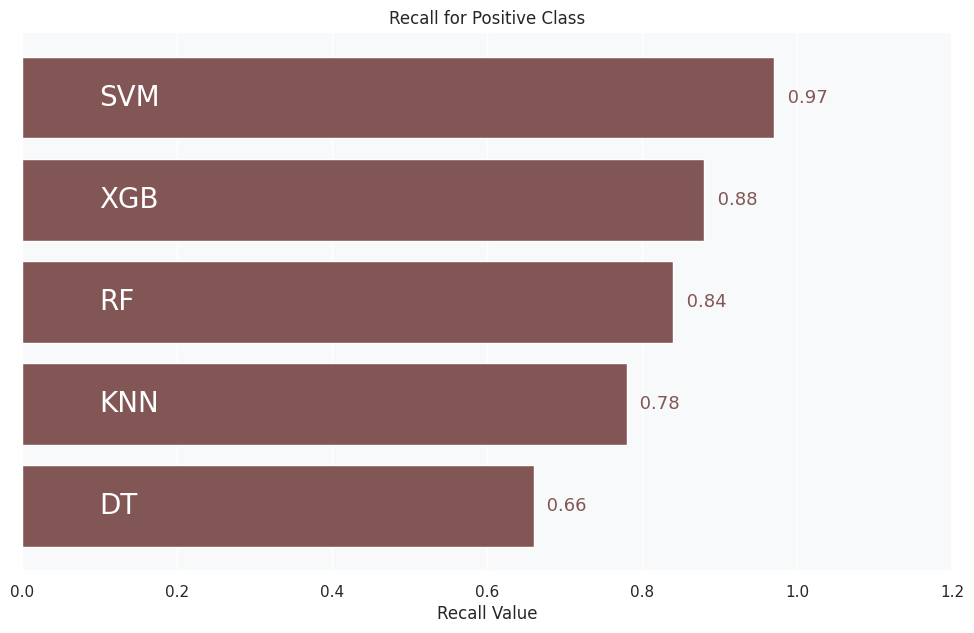

In [127]:
results = results.sort_values(by = 'recall_1', ascending = True)
recall_1 = results['recall_1']

fig, ax = plt.subplots(figsize = (12, 7))

ax.barh(results.index, recall_1, color = palette[0])

for i, (value, name) in enumerate(zip(recall_1, results.index)):
    ax.text(value + 0.01, i, f'{value: .2f}', ha = 'left', va = 'center', 
           color = palette[0], fontsize = 13)
    ax.text(0.1, i, name, ha = 'left', va = 'center', color = 'white', fontsize = 20)

ax.set_yticks([])
ax.set_xlim([0, 1.2])

plt.title('Recall for Positive Class')
plt.xlabel('Recall Value')
plt.show()

**Conclusions:**

<br />

The SVM model has a better performance comparing to other model in recognizing potential heart diseases. With a recall of 0.97 for class 1, its evident that almost all patient with heart disease are correctly identified